In [1]:
import os;os.getcwd()
from traceback import format_exc

In [2]:
from cn_correct import CompareCorrect as CC

In [3]:
from warnings import filterwarnings
filterwarnings('ignore')

In [4]:
#cc=CC()

modeldict {'cross_validate': {'n_reps': 3, 'strategy': 'leave_one_member_out'}, 'model_geog': 'section', 'sources': {'observed': 'nldas', 'modeled': 'cn'}, 'filter': 'nonzero', 'train_share': 0.8, 'split_order': 'chronological', 'model_scale': 'division', 'model_specs': {'lasso': {'max_poly_deg': 5, 'fit_intercept': False}}, 'results_folder': 'results/2151729b346f765c4bace9b03d037f01'}
complete
modeldict {'cross_validate': {'n_reps': 3, 'strategy': 'leave_one_member_out'}, 'model_geog': 'section', 'sources': {'observed': 'nldas', 'modeled': 'cn'}, 'filter': 'nonzero', 'train_share': 0.8, 'split_order': 'chronological', 'model_scale': 'division', 'model_specs': {'gbr': {'kwargs': {}}}, 'results_folder': 'results/9ebc853d4e365c084684f515fdb0322d'}
complete
modeldict {'cross_validate': {'n_reps': 3, 'strategy': 'leave_one_member_out'}, 'model_geog': 'section', 'sources': {'observed': 'nldas', 'modeled': 'cn'}, 'filter': 'nonzero', 'train_share': 0.8, 'split_order': 'chronological', 'model

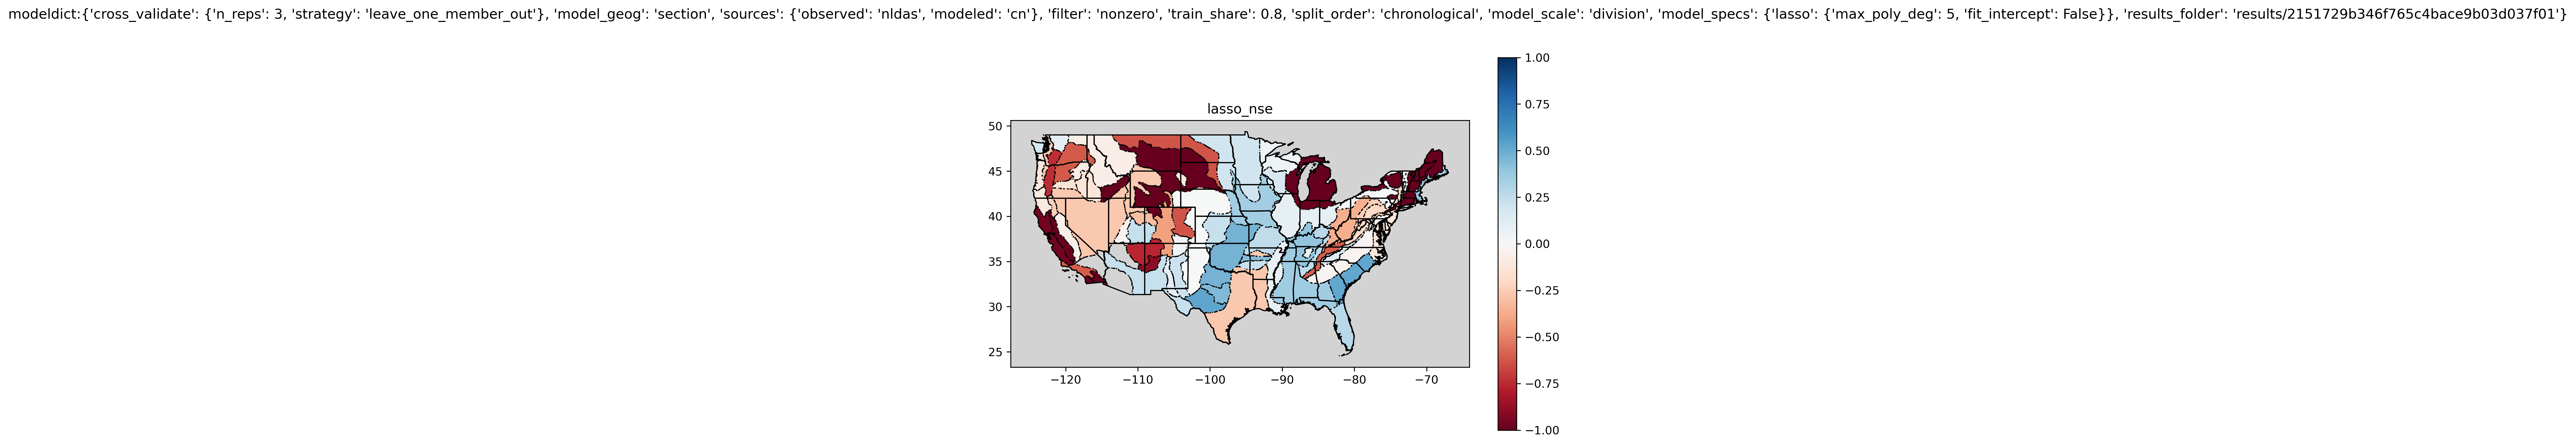

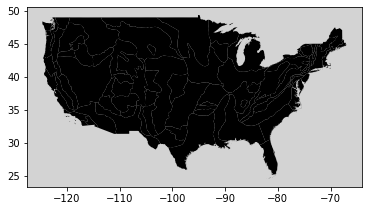

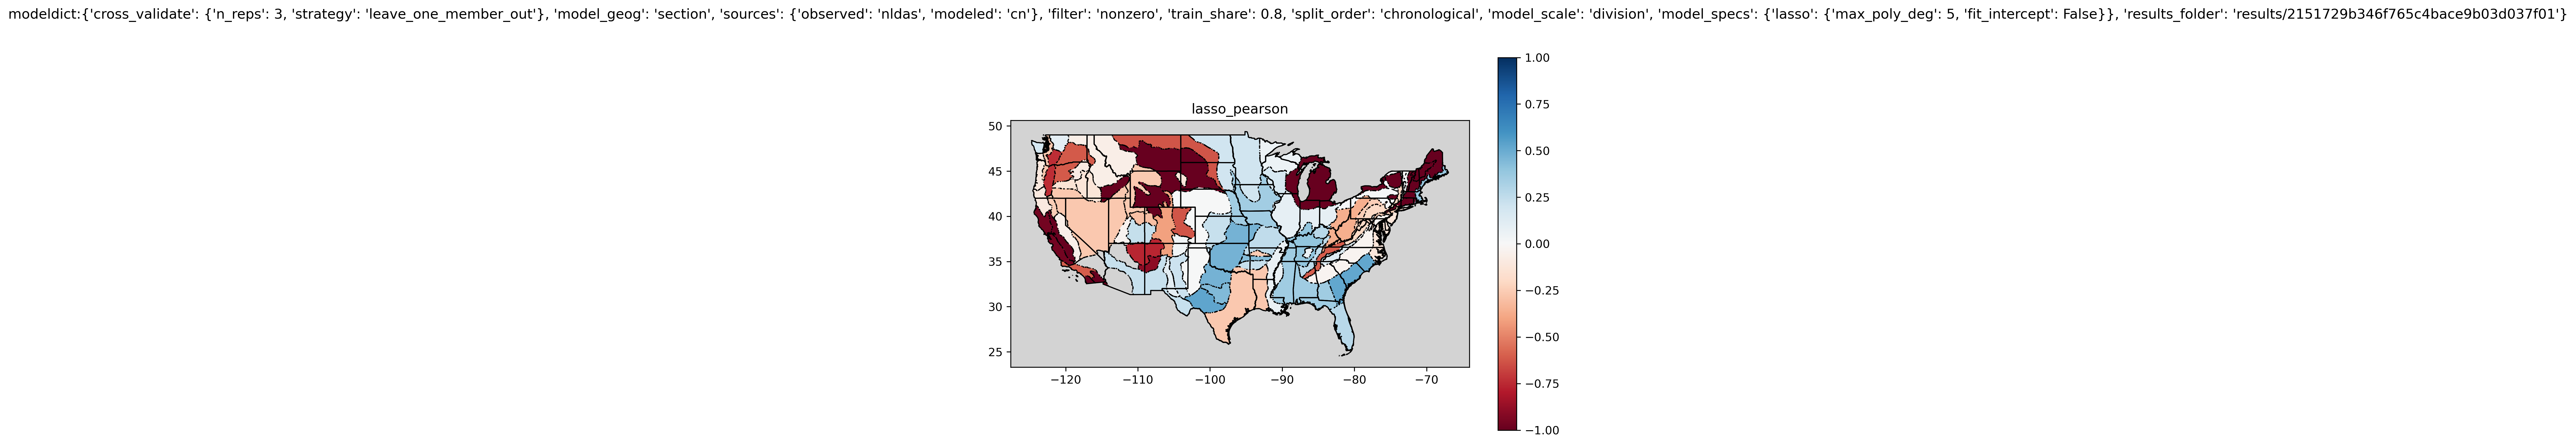

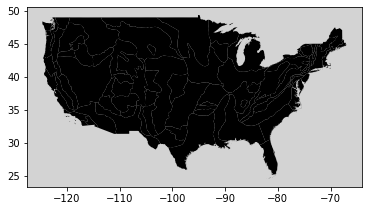

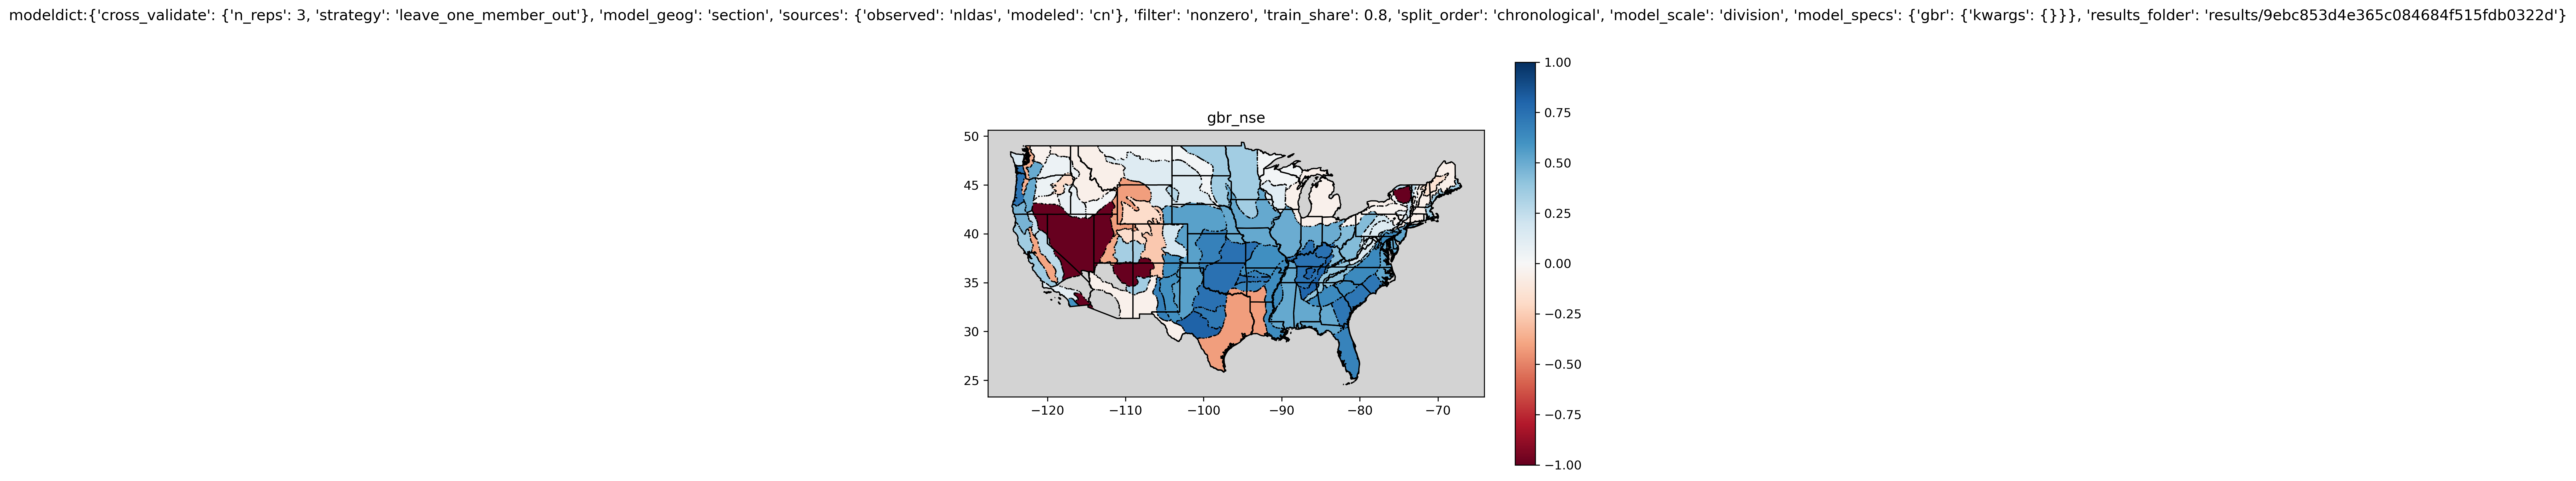

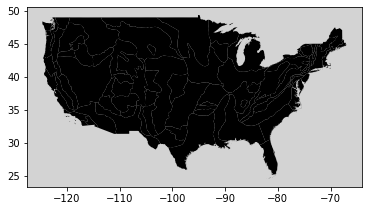

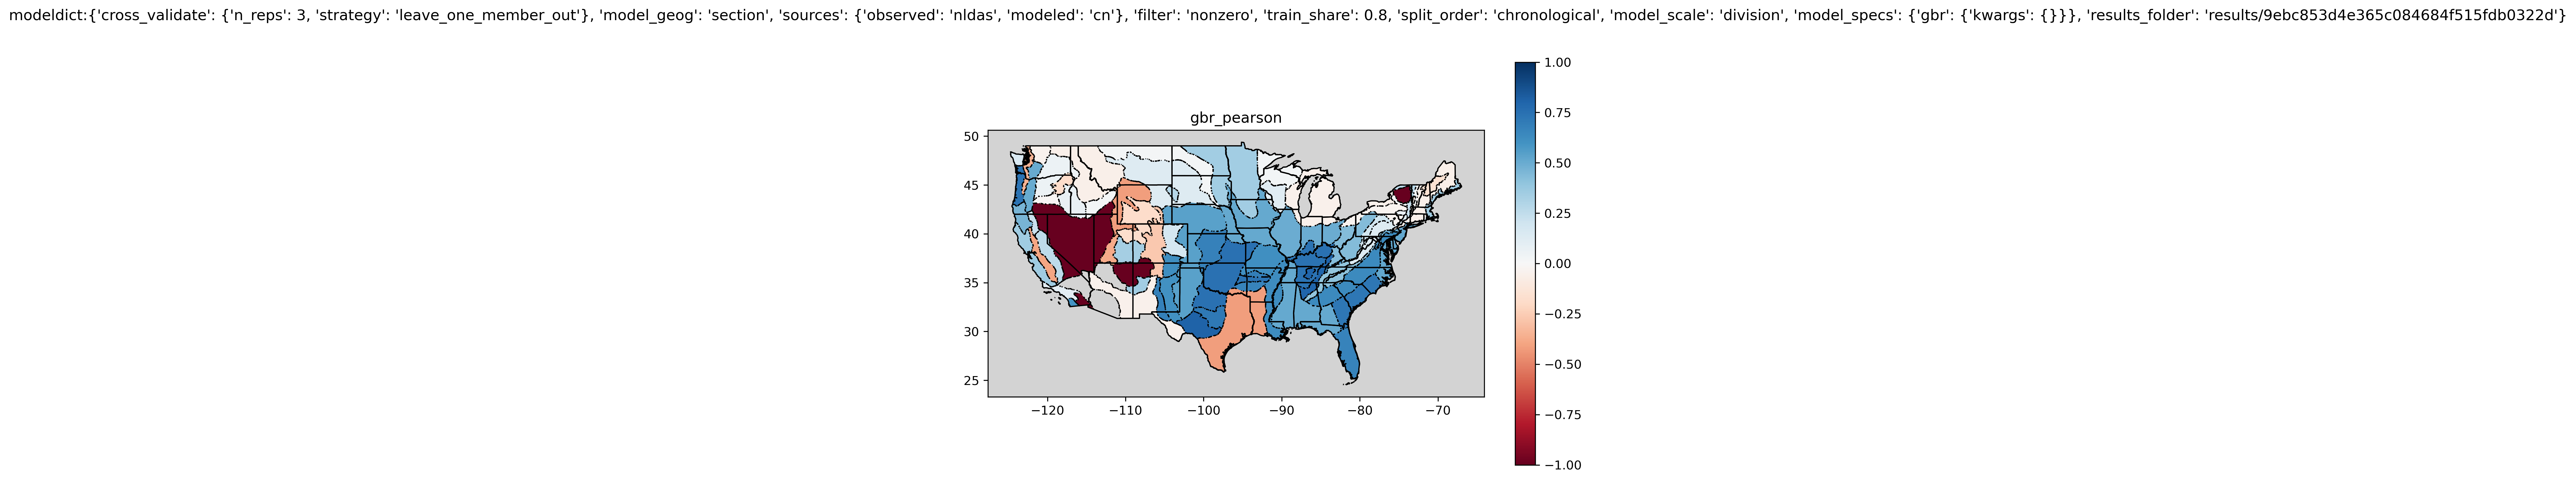

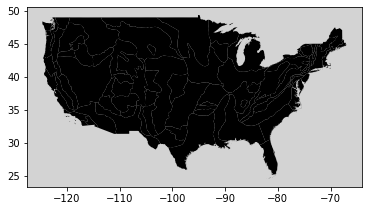

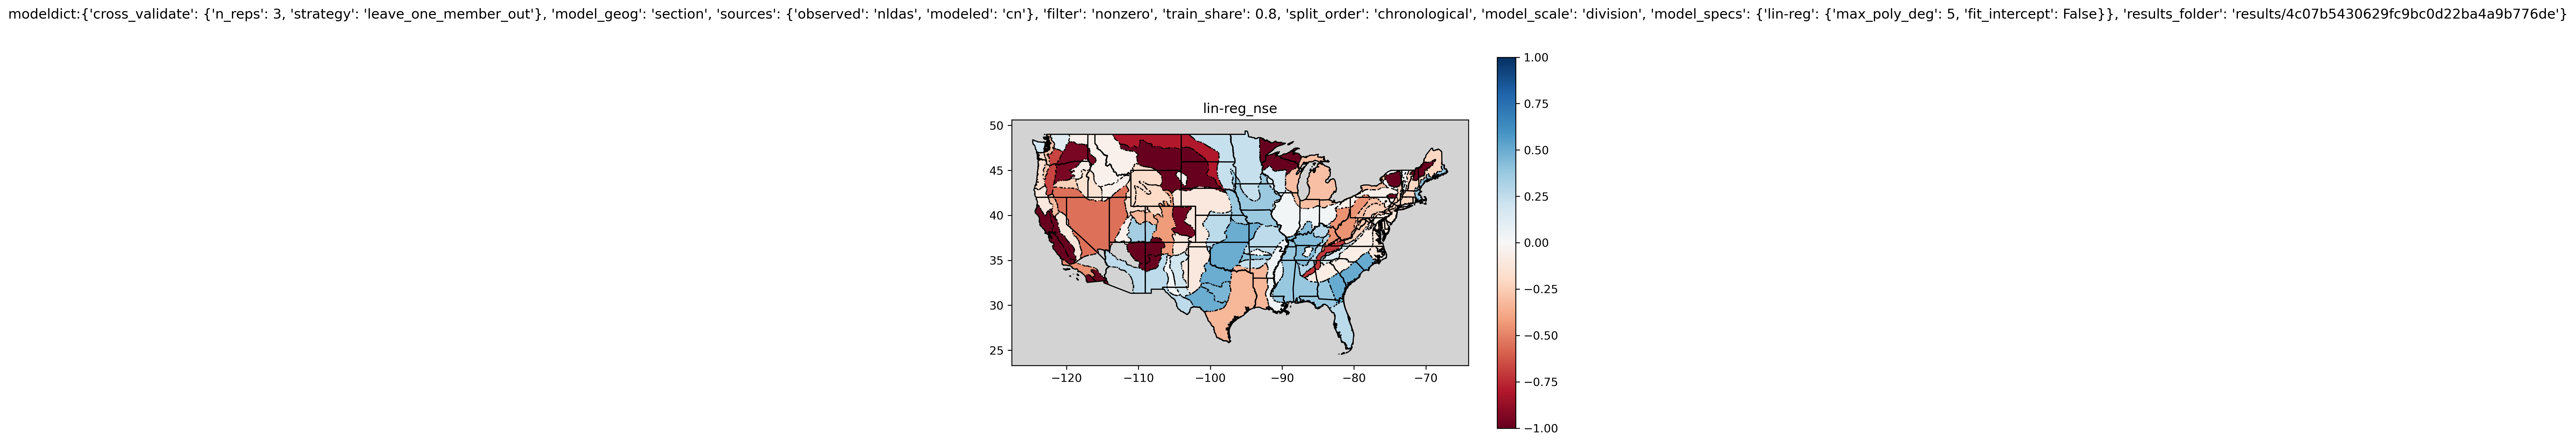

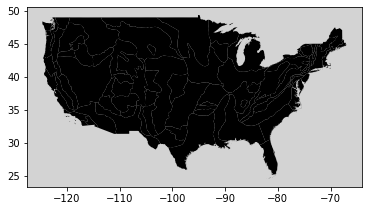

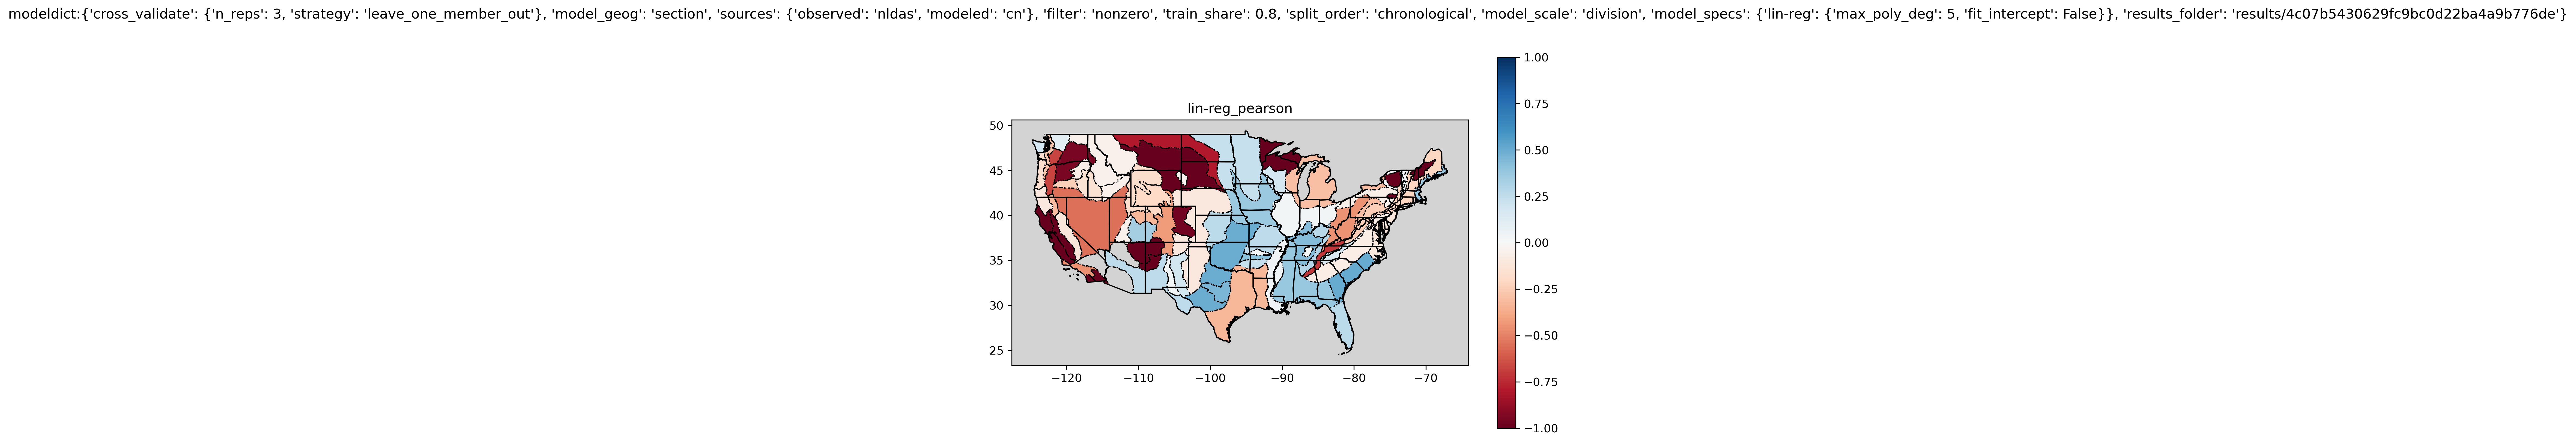

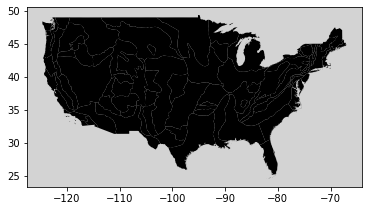

In [5]:
model_spec_list=[
    {'lasso':{'max_poly_deg':5,'fit_intercept':False}},
    {'gbr':{
        'kwargs':{},#these pass through to sklearn's gbr
            #'n_estimators':10000,
            #'subsample':1,
            #'max_depth':3
            }},
    {'lin-reg':{'max_poly_deg':5,'fit_intercept':False}},
]
for model_spec in model_spec_list:
    try:
        cc=CC(model_specs=model_spec)
        print('modeldict',cc.modeldict)
        cc.runBigModel()
        cc.plotGeoTestData()
        print('complete')
    except:
        print(format_exc())
        assert False,'halt'


<AxesSubplot:>

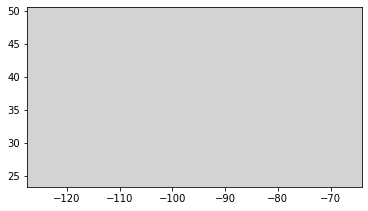

In [6]:
cc.eco.dissolve(by='section').plot(color='lightgrey')

In [7]:
rocky_bool=cc.eco.loc[:,'division']=='ROCKY MOUNTAIN SYSTEM'
cc.eco[rocky_bool]

area  perimeter  physiodd_  physiodd_i  fcode fencode  \
4    30.059     28.208          6          48    190      19   
75   13.999     29.532         77           4    180      18   
139  11.109     22.546        141          12    170      17   
149  12.244     25.734        151          14    160      16   

                  division                  province  \
4    ROCKY MOUNTAIN SYSTEM  NORTHERN ROCKY MOUNTAINS   
75   ROCKY MOUNTAIN SYSTEM    MIDDLE ROCKY MOUNTAINS   
139  ROCKY MOUNTAIN SYSTEM             WYOMING BASIN   
149  ROCKY MOUNTAIN SYSTEM  SOUTHERN ROCKY MOUNTAINS   

                      section  provcode  \
4    NORTHERN ROCKY MOUNTAINS        19   
75     MIDDLE ROCKY MOUNTAINS        18   
139             WYOMING BASIN        17   
149  SOUTHERN ROCKY MOUNTAINS        16   

                                              geometry  
4    POLYGON ((-119.67419 49.00147, -118.84358 48.9...  
75   POLYGON ((-110.13737 45.77462, -110.13851 45.7...  
139  POLYGON ((-106.96860 43.34317, -106.93162 43.2...  
149  POLYGON ((-106.40696 42.72720, -106.29897 42.7...

In [8]:
eco=cc.eco.copy()
geog='section'
bigger_geog='province'
eco.loc[:,geog].fillna(eco.loc[:,bigger_geog],inplace=True)
eco

area  perimeter  physiodd_  physiodd_i  fcode fencode  \
0    40.121     36.938          2          72    122     12b   
1    21.976     39.951          3          59    131     13a   
2     2.706     18.014          4          33    241     24a   
3     3.636      8.140          5          34    231     23a   
4    30.059     28.208          6          48    190      19   
..      ...        ...        ...         ...    ...     ...   
496   0.001      0.123        498         496     33      3c   
497   0.000      0.072        499         498     33      3c   
498   0.002      0.231        500         499     33      3c   
499   0.001      0.162        501         501     33      3c   
500   0.001      0.187        502         500     33      3c   

                    division                  province  \
0            INTERIOR PLAINS           CENTRAL LOWLAND   
1            INTERIOR PLAINS              GREAT PLAINS   
2    PACIFIC MOUNTAIN SYSTEM            PACIFIC BORDER   
3    PACIFIC MOUNTAIN SYSTEM  CASCADE-SIERRA MOUNTAINS   
4      ROCKY MOUNTAIN SYSTEM  NORTHERN ROCKY MOUNTAINS   
..                       ...                       ...   
496           ATLANTIC PLAIN             COASTAL PLAIN   
497           ATLANTIC PLAIN             COASTAL PLAIN   
498           ATLANTIC PLAIN             COASTAL PLAIN   
499           ATLANTIC PLAIN             COASTAL PLAIN   
500           ATLANTIC PLAIN             COASTAL PLAIN   

                         section  provcode  \
0                   WESTERN LAKE        12   
1    MISSOURI PLATEAU, GLACIATED        13   
2                   PUGET TROUGH        24   
3     NORTHERN CASCADE MOUNTAINS        23   
4       NORTHERN ROCKY MOUNTAINS        19   
..                           ...       ...   
496                    FLORIDIAN         3   
497                    FLORIDIAN         3   
498                    FLORIDIAN         3   
499                    FLORIDIAN         3   
500                    FLORIDIAN         3   

                                              geometry  
0    POLYGON ((-103.00201 49.00395, -102.94103 49.0...  
1    POLYGON ((-113.55362 48.99719, -112.19278 48.9...  
2    POLYGON ((-122.35828 47.59034, -122.33666 47.5...  
3    POLYGON ((-122.14882 49.00173, -120.85696 48.9...  
4    POLYGON ((-119.67419 49.00147, -118.84358 48.9...  
..                                                 ...  
496  POLYGON ((-81.42094 24.64500, -81.46506 24.666...  
497  POLYGON ((-81.42094 24.64500, -81.41373 24.672...  
498  POLYGON ((-81.70815 24.58081, -81.70338 24.599...  
499  POLYGON ((-82.10853 24.56015, -82.10152 24.575...  
500  POLYGON ((-81.81126 24.55392, -81.73983 24.581...  

[501 rows x 11 columns]

In [9]:
new=cc.eco[null_bool].loc[:,bigger_geog]


NameError: name 'null_bool' is not defined

In [ ]:
cc.eco[null_bool].loc[:,bigger_geog]

In [ ]:
#null_bool=cc.eco.loc[:,geog].isnull()
cc.eco[null_bool]

In [ ]:
cc.eco[cc.eco.loc[:,geog].isnull()]

In [ ]:
cc.eco_geog[cc.eco_geog.loc[:,'division']=='ROCKY MOUNTAIN SYSTEM']

In [ ]:
cc.dc.big_x_train

In [ ]:
cc.dc.big_x_train.index.get_level_values('comid').unique().to_list()

In [ ]:
for m in cc.dc.model_results['gbr']:
    with open(m,'rb') as f:
        model=pickle.load(f)
    print(len(model.train_comids))

In [ ]:
print(len(cc.dc.comid_modeling_objects))
for obj in cc.dc.comid_modeling_objects[:100]:
    print(obj.test_results['gbr'])
          

In [ ]:
assert False,'stop'

In [ ]:
cc.dc.model_results

In [ ]:
for obj in cc.dc.comid_modeling_objects:
    for m_name, results_list in obj.test_results.items():
        print(m_name,'result len:',len(results_list))
        for result in results_list:
            print(m_name,result)

In [ ]:
cc.dc.big_y_train.loc[20867042]

In [ ]:
-

In [ ]:
cc.dc.onehot.transform(cc.dc.big_x_train_raw.loc[:,cc.dc.obj_cols])

In [ ]:
cc.dc.onehot.get_feature_names(cc.dc.obj_cols)

In [ ]:
list(cc.dc.big_x_train_raw.dtypes.items())

In [ ]:
cc.dc.comid_data_object_dict[5879121].runoff_model_data_df

In [ ]:
cc.dc.comid_geog_dict

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
cc.comid_physio[cc.comid_physio.loc[:,'section'].isna()].to_csv('missing_section.csv')

In [ ]:
cc.comid_physio.isnull().any(axis=0)

In [ ]:
cc.modeldict['filter']='nonzero'
cc.modeldict

In [ ]:
cc.runModelCorrection(try_load=False)

In [ ]:
cc.modeldict['filter']='none'
cc.runModelCorrection(try_load=False)